**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

**Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
data = pd.read_csv("train-chennai-sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
# checking number of col and and rows
data.shape

(7109, 22)

In [ ]:
#dropping unncessary columns
data = data.drop(columns = ['REG_FEE'])
data = data.drop(columns = ['COMMIS'])
data = data.drop(columns = ['PRT_ID'])

In [ ]:
# checking null values
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

In [ ]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>0]
for feature in features_with_na:
  print(feature,np.round(data[feature].isnull().mean(),4), '% missing values')

N_BEDROOM 0.0001 % missing values
N_BATHROOM 0.0007 % missing values
QS_OVERALL 0.0068 % missing values


**AREA**

In [ ]:
data["AREA"].unique()


array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
area = data.AREA.value_counts().reset_index(name='count')
area['percentage'] = round(area['count'] / data.shape[0] * 100, 2)
area

,index,count,percentage
0,Chrompet,1681,23.65
1,Karapakkam,1363,19.17
2,KK Nagar,996,14.01
3,Velachery,979,13.77
4,Anna Nagar,783,11.01
5,Adyar,773,10.87
6,T Nagar,496,6.98
7,Chrompt,9,0.13
8,Chrmpet,6,0.08
9,Chormpet,6,0.08


In [ ]:
data.AREA = data.AREA.replace({'Karapakam':"Karapakkam","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar",'Chrompet':"Chromepet","Chrompt":'Chromepet',"Chormpet":"Chromepet","Chrmpet":"Chromepet"})
data.AREA = data.AREA.replace({'Adyr':"Adyar",'Velchery':"Velachery",'KK Nagar':"K. K. Nagar","KKNagar":"K. K. Nagar",'TNagar':"T Nagar","TNagar":"T Nagar"})

In [ ]:
data["AREA"].unique()


array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'K. K. Nagar', 'T Nagar'], dtype=object)

In [ ]:
data["AREA"].isnull().sum()


0

**SQUARE FEET**

In [ ]:
data['INT_SQFT'].isnull().sum()


0

In [ ]:
data.INT_SQFT.describe()


count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

**AGE OF BUILDING**

In [ ]:
# converting to datatime format
import datetime as dt
data["DATE_SALE"] = pd.to_datetime(data["DATE_SALE"], format='%d-%m-%Y')

In [ ]:
data["DATE_BUILD"] =  pd.to_datetime(data["DATE_BUILD"], format='%d-%m-%Y')


In [ ]:
# calculating age of building 
data['AGE'] = (data['DATE_SALE'].dt.year - data['DATE_BUILD'].dt.year).astype(int)
data.loc[data['DATE_SALE'].dt.month < data['DATE_BUILD'].dt.month, 'AGE'] = data['AGE'] - 1
data.loc[(data['DATE_SALE'].dt.month == data['DATE_BUILD'].dt.month) & (data['DATE_SALE'].dt.day < data['DATE_BUILD'].dt.day), 'AGE'] = data['AGE'] - 1

In [ ]:
data.head()


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10
2,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,21
4,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,29


In [ ]:
#dropping columns
data = data.drop(columns = ['DATE_BUILD'])
data = data.drop(columns = ['DATE_SALE'])

In [ ]:
# checking null values
data["AGE"].isnull().sum()

0

**DISTANCE TO MAIN ROAD**

In [ ]:
data["DIST_MAINROAD"].isnull().sum()


0

In [ ]:
data.DIST_MAINROAD.describe()


count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

**BED ROOM**

In [ ]:
data.N_BEDROOM.describe()


count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [ ]:
data["N_BEDROOM"].isnull().sum()


1

In [ ]:
data["N_BEDROOM"].mode()


0    1.0
dtype: float64

In [ ]:
data.N_BEDROOM = data.N_BEDROOM.replace({np.nan:1.0})


In [ ]:
data["N_BEDROOM"].isnull().sum()


0

In [ ]:
data.N_BEDROOM = data.N_BEDROOM.astype(int)


**BATHROOM**

In [ ]:
data.N_BATHROOM.describe()


count    7104.000000
mean        1.213260
std         0.409639
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [ ]:
data["N_BATHROOM"].isnull().sum()


5

In [ ]:
#filling null values with mode
data["N_BATHROOM"].mode()

0    1.0
dtype: float64

In [ ]:
data.N_BATHROOM = data.N_BATHROOM.replace({np.nan:1.0})


In [ ]:
data.N_BATHROOM = data.N_BATHROOM.astype(int)


In [ ]:
data["N_BATHROOM"].isnull().sum()


0

**ROOMS**

In [ ]:
data.N_ROOM.describe()


count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [ ]:
data["N_ROOM"].isnull().sum()


0

In [ ]:
data.N_ROOM = data.N_ROOM.astype('int64')


**SALE COND**

In [ ]:
data.SALE_COND.describe()


count        7109
unique          9
top       AdjLand
freq         1433
Name: SALE_COND, dtype: object

In [ ]:
data["SALE_COND"].isnull().sum()


0

In [ ]:
data["SALE_COND"].unique()


array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data.SALE_COND = data.SALE_COND.replace({'AbNormal':"Abnormal",'Ab Normal':"Abnormal",'Adj Land':"AdjLand",'PartiaLl':"Partial",'Partiall':"Partial"})


**PARK FACILITY**

In [ ]:
data["PARK_FACIL"].unique()


array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data.PARK_FACIL = data.PARK_FACIL.replace({'Noo':"No"})

In [ ]:
data["PARK_FACIL"].describe()

count     7109
unique       2
top        Yes
freq      3587
Name: PARK_FACIL, dtype: object

In [ ]:
data["PARK_FACIL"].isnull().sum()

0

**BUILD TYPE**

In [ ]:
data["BUILDTYPE"].isnull().sum()

0

In [ ]:
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
data.BUILDTYPE = data.BUILDTYPE.replace({'Comercial':"Commercial",'Other':"Others"})

**UTILITY AVAILABLE**

In [ ]:
data["UTILITY_AVAIL"].isnull().sum()

0

In [ ]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'All Pub':"AllPub"})

In [ ]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

**STREET TYPE**

In [ ]:
data["STREET"].isnull().sum()


0

In [ ]:
data["STREET"].unique()


array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
data.STREET = data.STREET.replace({'Pavd':'Paved',"NoAccess":"No Access"})

**M ZONE**

In [ ]:
data["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
data["QS_OVERALL"].mean()

3.5032537884152384

In [ ]:
data.QS_OVERALL = data.QS_OVERALL.replace({np.nan:3.50})

In [ ]:
data["QS_OVERALL"].dtypes

dtype('float64')

**CO RELATION BETWEEN FEATURES**

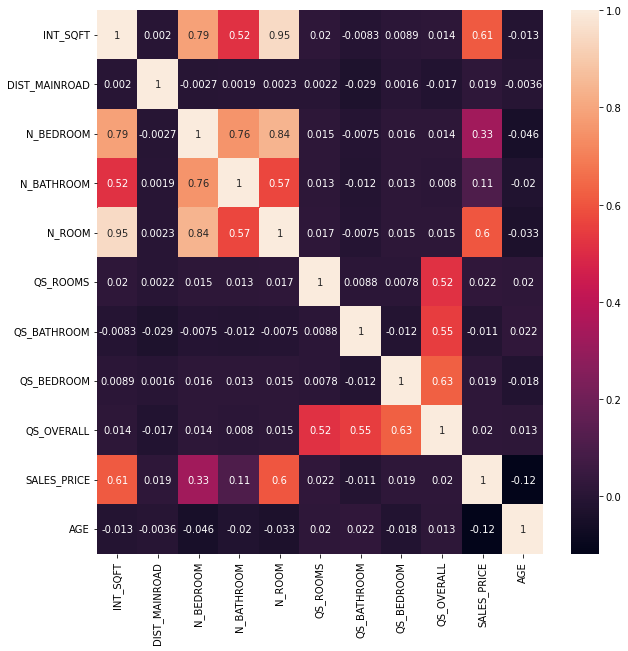

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

**EXPLORATORY DATA ANALYSIS**

Text(0.5, 1.0, 'Number of sales in each area')

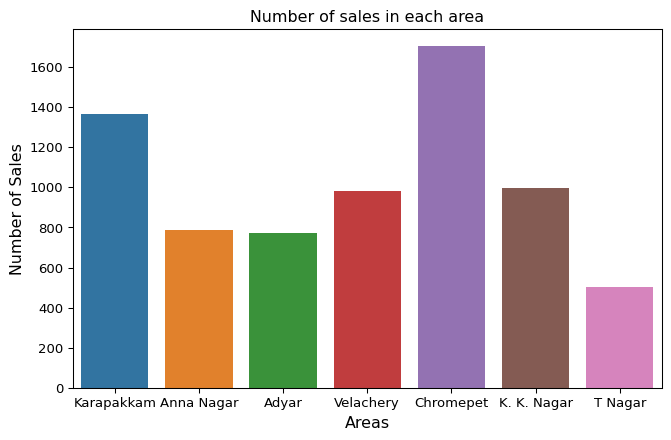

In [ ]:
a = data["AREA"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=95)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Areas", fontsize = 12)
b.set_ylabel("Number of Sales", fontsize = 12)
b.set_title("Number of sales in each area")

Text(0.5, 1.0, 'Number of Public facilities')

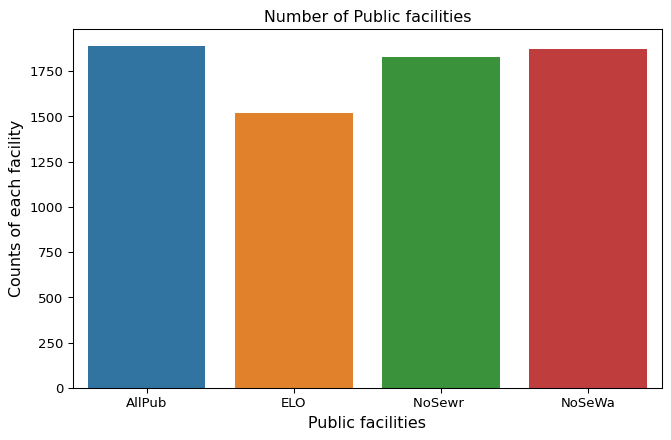

In [ ]:
a = data["UTILITY_AVAIL"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=95)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Public facilities", fontsize = 12)
b.set_ylabel("Counts of each facility", fontsize = 12)
b.set_title("Number of Public facilities")

Text(0.5, 1.0, 'Counts of building types')

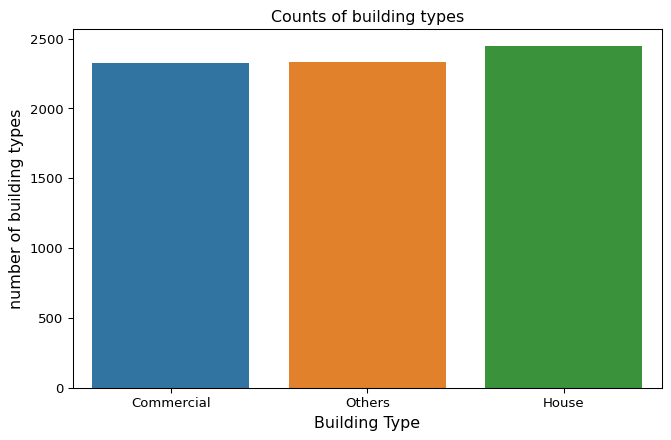

In [ ]:
a = data["BUILDTYPE"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=95)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Building Type", fontsize = 12)
b.set_ylabel("number of building types", fontsize = 12)
b.set_title("Counts of building types")

Text(0.5, 1.0, 'Number of Public facilities')

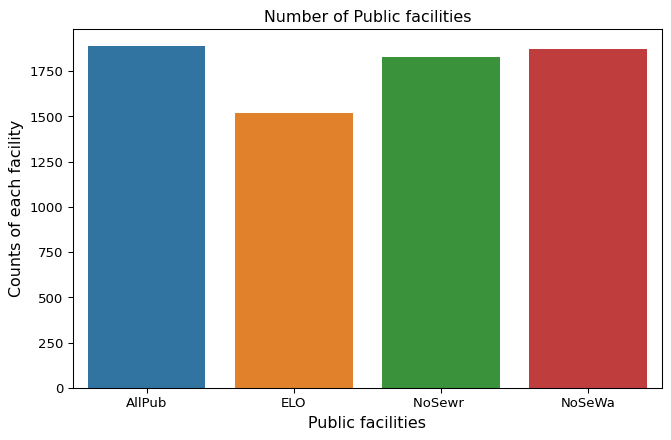

In [ ]:
a = data["UTILITY_AVAIL"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=95)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Public facilities", fontsize = 12)
b.set_ylabel("Counts of each facility", fontsize = 12)
b.set_title("Number of Public facilities")

Text(0.5, 1.0, 'Number of SALE_COND')

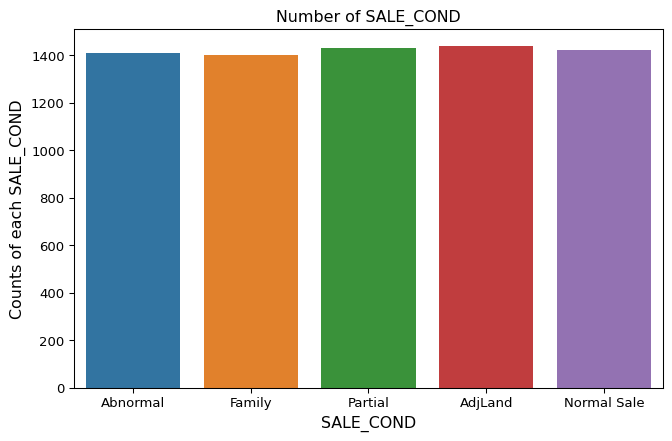

In [ ]:
a = data["SALE_COND"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=95)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("SALE_COND", fontsize = 12)
b.set_ylabel("Counts of each SALE_COND", fontsize = 12)
b.set_title("Number of SALE_COND")

Text(0.5, 1.0, 'Number of counts in each type of street')

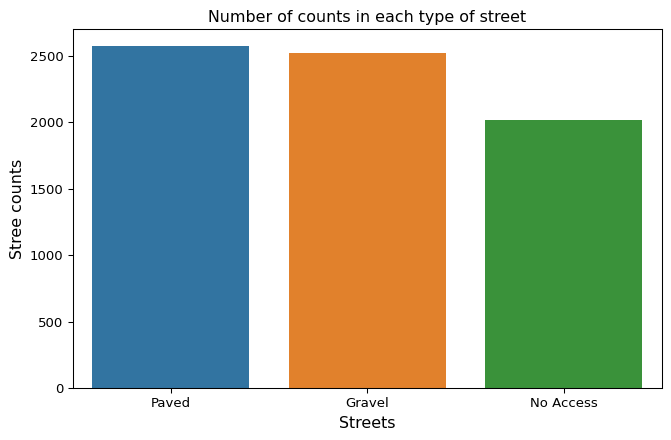

In [ ]:
a = data["STREET"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=95)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Streets", fontsize = 12)
b.set_ylabel("Stree counts", fontsize = 12)
b.set_title("Number of counts in each type of street")

**CHECKING THE RELATIONSHIP BETWEEN FEATURE AND TARGET**




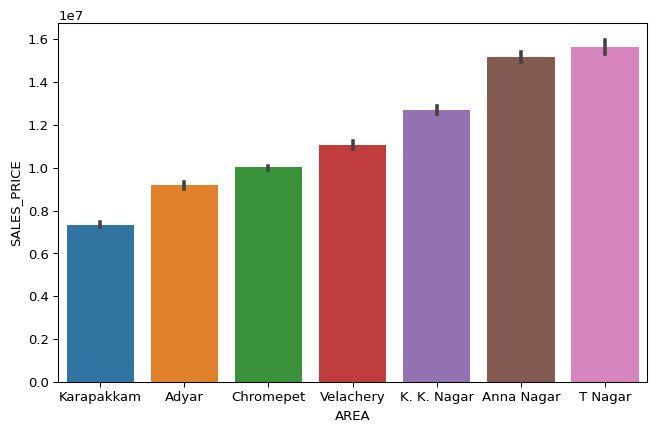

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.barplot(x = data.AREA, y = data.SALES_PRICE, order = data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

From the above graph we can infer that the max sales price is in the area T Nagar followed by Anna Nagar and K K Nagar, the least sales price is in the area Karapakkam.

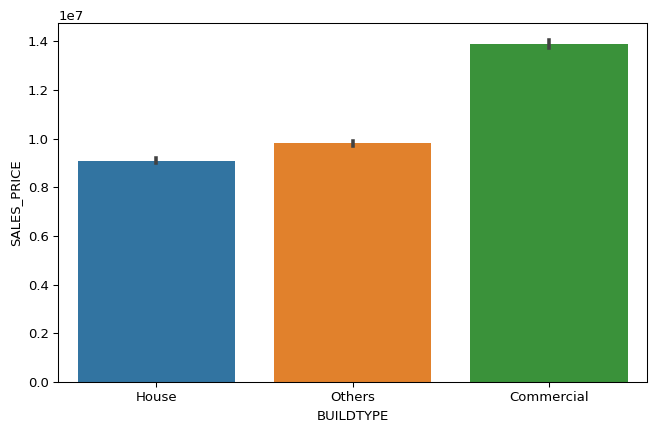

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.barplot(x = data.BUILDTYPE, y = data.SALES_PRICE, order = data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

The graph shows us that the commercial building are the costliest compared to house and others.

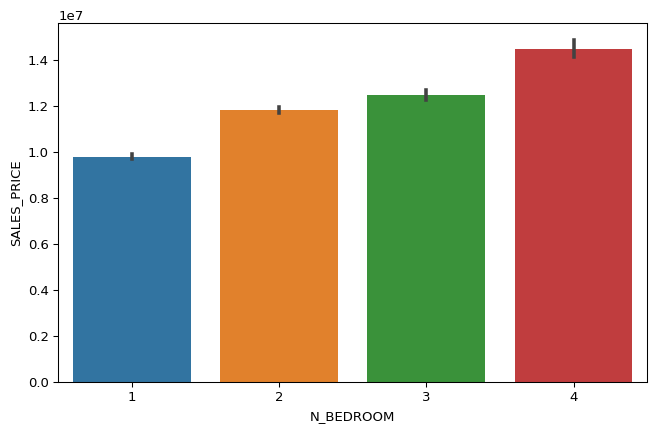

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.barplot(x = data.N_BEDROOM, y = data.SALES_PRICE, order = data.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])


The graph tells us that the 4 bedroom house has the higest sales price followed by 3,2,1 bedroom houses.

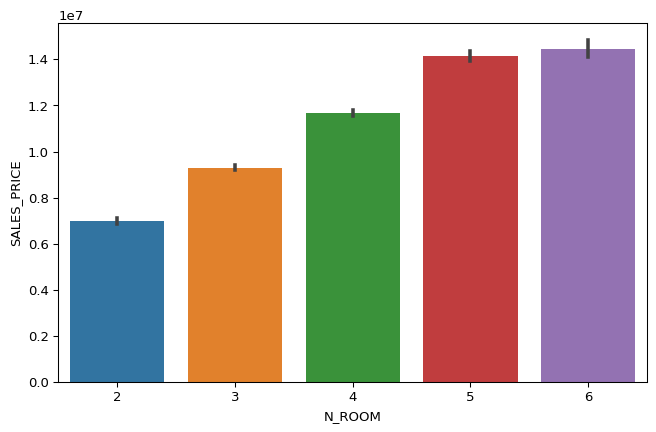

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.barplot(x = data.N_ROOM, y = data.SALES_PRICE, order = data.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])

The graph tells us that the 4 bedroom house has the higest sales price followed by 3,2,1 bedroom houses.

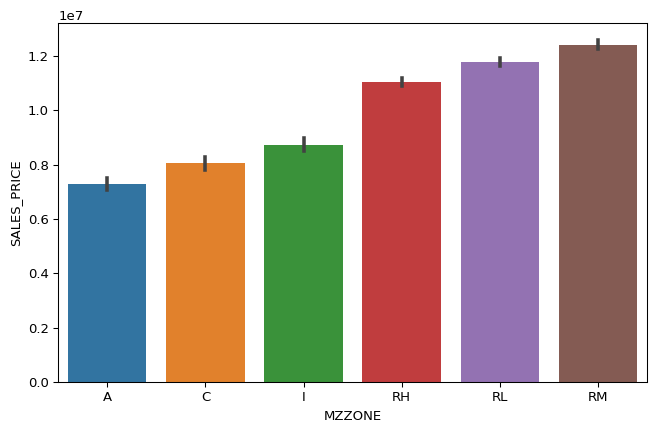

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.barplot(x = data.MZZONE, y = data.SALES_PRICE, order = data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

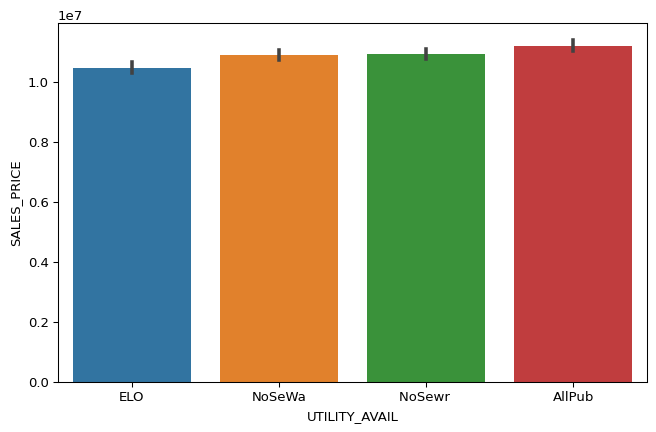

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.barplot(x = data.UTILITY_AVAIL, y = data.SALES_PRICE, order = data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

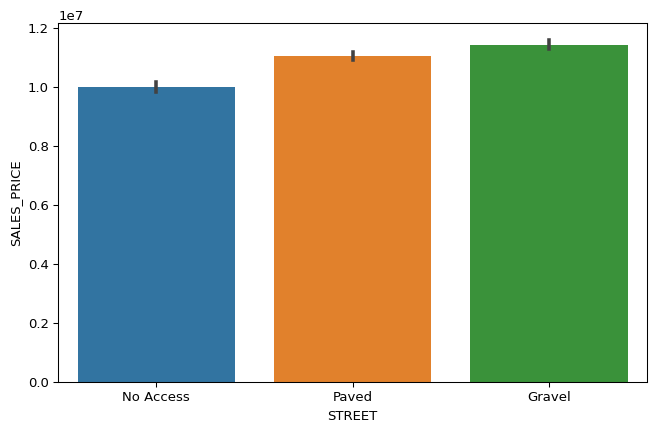

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.barplot(x = data.STREET, y = data.SALES_PRICE, order = data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

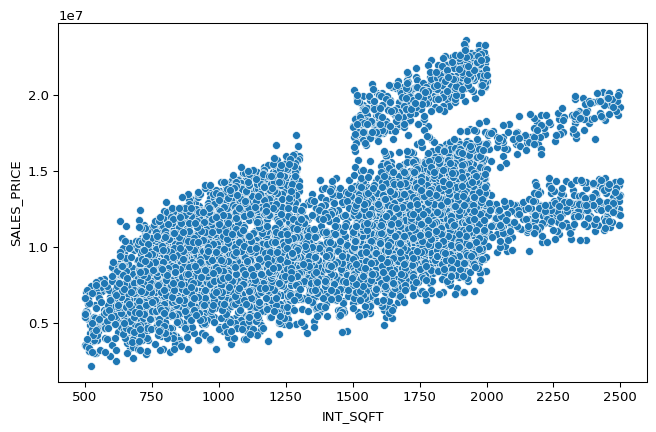

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.scatterplot(data=data, x="INT_SQFT", y="SALES_PRICE")

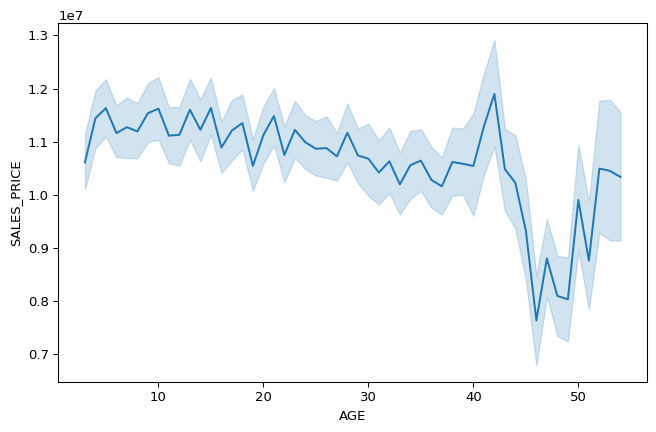

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.lineplot(data=data, x="AGE", y="SALES_PRICE")

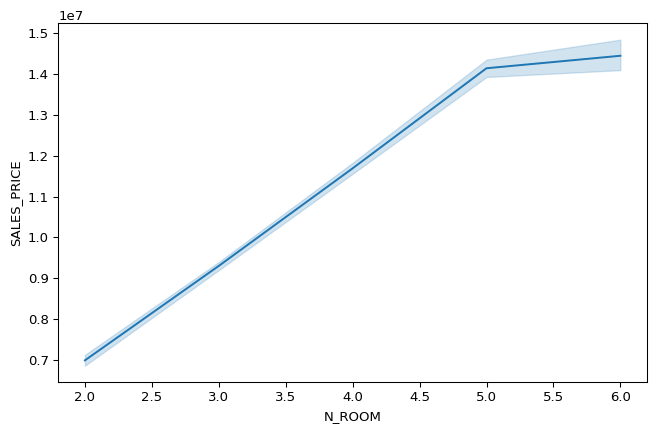

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.lineplot(data=data, x="N_ROOM", y="SALES_PRICE")

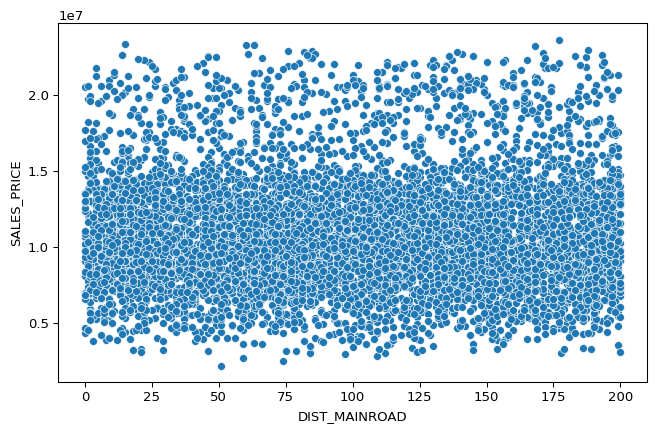

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=95)
sns.scatterplot(data=data, x="DIST_MAINROAD", y="SALES_PRICE")

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,Abnormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43
1,Anna Nagar,1986,26,2,1,5,Abnormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10
2,Adyar,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,21
4,Karapakkam,1226,84,1,1,3,Abnormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,29


In [ ]:
data = data.drop(columns = ['QS_OVERALL'])
data = data.drop(columns = ['DIST_MAINROAD'])
data = data.drop(columns = ['QS_BEDROOM'])
data = data.drop(columns = ['QS_ROOMS'])
data = data.drop(columns = ['QS_BATHROOM'])

**ENCODING**

In [ ]:
# Encoding Area
data.AREA = data.AREA.map({'Karapakkam':1,"Adyar":2,"Chromepet":3,"Velachery":4,"K. K. Nagar":5,"Anna Nagar":6,"T Nagar":7})

In [ ]:
data["AREA"].unique()

array([1, 6, 2, 4, 3, 5, 7])

In [ ]:
data.SALE_COND = data.SALE_COND.map({"Partial":1,"Family":2,"Abnormal":3,"Normal Sale":4,"AdjLand":5})

In [ ]:
data["SALE_COND"].unique()

array([3, 2, 1, 5, 4])

In [ ]:
data["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data.PARK_FACIL = data.PARK_FACIL.map({'Yes':1,'No':0})

In [ ]:
data["PARK_FACIL"].unique()

array([1, 0])

In [ ]:
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
dummies1 = pd.get_dummies(data["BUILDTYPE"])
data= pd.concat([data,dummies1], axis=1)
data = data.drop('BUILDTYPE',axis=1)

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1,1,3,3,1,AllPub,Paved,A,7600000,43,1,0,0
1,6,1986,2,1,5,3,0,AllPub,Gravel,RH,21717770,10,1,0,0
2,2,909,1,1,3,3,1,ELO,Gravel,RL,13159200,19,1,0,0
3,4,1855,3,2,5,2,0,NoSewr,Paved,I,9630290,21,0,0,1
4,1,1226,1,1,3,3,1,AllPub,Gravel,C,7406250,29,0,0,1


In [ ]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [ ]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'ELO':1,'NoSeWa':2,'NoSewr ':3,"AllPub":4})

In [ ]:
data["UTILITY_AVAIL"].unique()

array([4, 1, 3, 2])

In [ ]:
data["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
data.STREET = data.STREET.map({'No Access':0,'Paved':1,'Gravel':2})

In [ ]:
data["STREET"].unique()

array([1, 2, 0])

In [ ]:
data["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
data.MZZONE = data.MZZONE.map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})

In [ ]:
data["MZZONE"].unique()

array([0, 4, 5, 2, 1, 6])

In [ ]:
data.head(5)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1,1,3,3,1,4,1,0,7600000,43,1,0,0
1,6,1986,2,1,5,3,0,4,2,4,21717770,10,1,0,0
2,2,909,1,1,3,3,1,1,2,5,13159200,19,1,0,0
3,4,1855,3,2,5,2,0,3,1,2,9630290,21,0,0,1
4,1,1226,1,1,3,3,1,4,2,1,7406250,29,0,0,1


In [ ]:
data.isnull().sum()

AREA             0
INT_SQFT         0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
AGE              0
Commercial       0
House            0
Others           0
dtype: int64

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE',
       'Commercial', 'House', 'Others'],
      dtype='object')

**LINEAR REGRESSION**

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE","Commercial","House","Others"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9254788080582814


**KNN**

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE","Commercial","House","Others"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 3)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(20) 
knn.fit(X_train,y_train) 
y_pred=j=knn.predict(X_test)

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9325489653741252


**DECISION TREE**

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE","Commercial","House","Others"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9712389968599625


**BAGGING (Bootstrap aggregation)**

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE","Commercial","House","Others"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(max_depth = 1, random_state=1), n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.3657420825853154


**VOTING CLASSIFIER**

In [ ]:
from sklearn.ensemble import VotingRegressor 
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE","Commercial","House","Others"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6)

In [ ]:
model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(3)
model4 = xgb.XGBRegressor(random_state=2)
model = VotingRegressor(estimators=[('lr', model1), ('dt', model2),('knn',model3),('xgb',model4)])

In [ ]:
model.fit(X_train,y_train) 
preds = model.predict(X_test)
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[09:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9449443332646554

**RANDOM FOREST**

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE","Commercial","House","Others"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9449443332646554


**XGBOOST**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE","Commercial","House","Others"]].values
y = data[["SALES_PRICE"]].values
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,1.5,2,2.5]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3757160751350299  Cross-Val score :  -0.3826207990744903
Learning rate :  0.02  Train score :  0.7468745062209117  Cross-Val score :  0.7438281855427318
Learning rate :  0.03  Train score :  0.925212465932328  Cross-Val score :  0.9226672192020796
Learning rate :  0.04  Train score :  0.9625220139337222  Cross-Val score :  0.9603368125792267
Learning rate :  0.05  Train score :  0.9748034154495655  Cross-Val score :  0.9729314911120172
Learning rate :  0.1  Train score :  0.9920597104764132  Cross-Val score :  0.991083924232868
Learning rate :  0.11  Train score :  0.9939327982013008  Cross-Val score :  0.9923398868516639
Learning rate :  0.12  Train score :  0.9943586411859218  Cross-Val score :  0.9931681307548917
Learning rate :  0.13  Train score :  0.9949409970109031  Cross-Val score :  0.9938898016113786
Learning rate :  0.14  Train score :  0.9957475568881055  Cross-Val score :  0.9944717851918228
Learning rate :  0.15  Train score :  0.9

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9973072900545455


In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred})

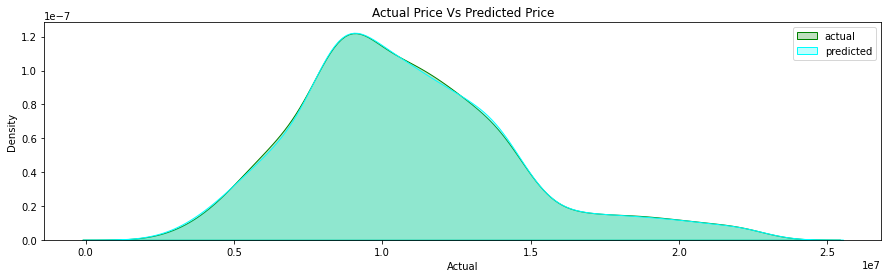

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=df, x='Actual', label='actual', color = 'green',shade=True)
sns.kdeplot(data=df, x='Predicted', label='predicted', color='cyan', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

[09:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb.feature_importances_

array([0.21291755, 0.07439764, 0.        , 0.00059125, 0.29198718,
       0.00436199, 0.02174819, 0.00147523, 0.01316836, 0.0506016 ,
       0.0033405 , 0.29336622, 0.03204426, 0.        ], dtype=float32)

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1,1,3,3,1,4,1,0,7600000,43,1,0,0
1,6,1986,2,1,5,3,0,4,2,4,21717770,10,1,0,0
2,2,909,1,1,3,3,1,1,2,5,13159200,19,1,0,0
3,4,1855,3,2,5,2,0,3,1,2,9630290,21,0,0,1
4,1,1226,1,1,3,3,1,4,2,1,7406250,29,0,0,1


In [ ]:
Model = pd.DataFrame({'model_name':['LinearRegression','DecissionTree','KNN',"Bagging",'RandomForest','Voting Classifier',"Xgboost"],'r2_score':[0.925,0.973,0.935,0.365,0.365,0.945,0.9966 ]})
Model

,model_name,r2_score
0,LinearRegression,0.9250
1,DecissionTree,0.9730
2,KNN,0.9350
3,Bagging,0.3650
4,RandomForest,0.3650
5,Voting Classifier,0.9450
6,Xgboost,0.9966


We found that the Xgboost model was the best fit model with the best R2 value of 99.66% which is very close to the actual values.

**Inferences:**

In customers point of view the areas Karapakkam and Chromepet are more affordable.

Constructing buildings in T Nagar, Anna Nagar and KK Nagar can result in more profit.

The building with all publlic facilities and gravel road tends to offer high sales price.

Construction of Commercial building shows higher profits and prices for the sellers and the houses are much cheaper comparitively.

Buildtype is the second most important Feature for better investments. Commercial Houses are most expensive compared to normal house.Sellers can profit if they build more of commercial building in T Nagar and Anna Nagar areas.

As the area in square Foot of the house increases, the price of the house also increases.

Zone also plays a major role in deciding the house price. Commercial and Industrial zones are more profitable.

Price of the property changes due to various factors.the major featuresaffecting the price are in the order of

1.Build Type (commercial being costliest)

2.Number of rooms

3.Parking Facility

4.Area (T Nagar has max pirce of property)

**Conclusions from Exploratory Data Analysis:**

Area of the property has impact on the price which is shown even through data where the houses in T Nagar and Anna Nagar are costlier than the other areas.

Houses with more number of rooms has higher prices as we can expect.

In General Parking facility has a greater impact on the sales price and it reflects the same in the analysis

Commercial buildings are expensive than other type of buildings.

Houses with all the public facilites are sold comparively high.

Properties with gravel roads have higher prices compared to others.

Agricultural zone has cheaper prices for the houses and Resedential Medium Density Zone is the expenive one.